<a href="https://colab.research.google.com/github/BranislavMajernik/zerocode/blob/master/CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def get_rule(idx):
    if idx < 256:
        input_patterns = [
            (1,1,1),
            (1,1,0),
            (1,0,1),
            (1,0,0),
            (0,1,1),
            (0,1,0),
            (0,0,1),
            (0,0,0)
        ]
        outputs = list(map(int,format(idx, "#010b")[2:]))
        mapping = dict(zip(input_patterns, outputs))
        mapping["name"] = "Rule %d" % (idx)
        return mapping
    else:
        raise ValueError("Rule number out of range")



In [3]:
def iterate(board, rule):
    board = np.pad(board, (1, 1), 'constant', constant_values=(0,0))
    new_board = np.zeros_like(board)
    for i in range(1, board.shape[0] - 1):
        new_board[i] = rule[tuple(board[i-1:i+2])]
    return new_board[1:-1]



In [4]:
def generate_map(initial_board, rule, num_iterations=100):
    
    if isinstance(initial_board, list):
        board = np.array(initial_board)
    else:
        board = initial_board
    
    board = np.pad(board, (num_iterations, num_iterations), 'constant', constant_values=(0,0))
    
    rows = [board]
    for i in range(num_iterations):
        board = iterate(board, rule)
        rows.append(board)

    rows = np.array(rows)
    return rows



In [5]:
def visualize_board(board, title=None):
    plt.figure(figsize=(5,2.5))
    plt.imshow(board, cmap="Greys")
    plt.axis("off")
    if title is not None:
        plt.title(title, fontsize=14)
    plt.show()
    plt.close()



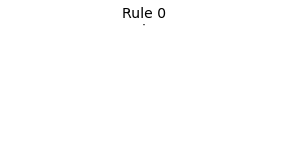

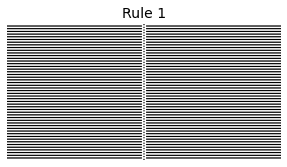

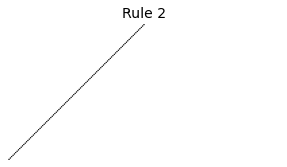

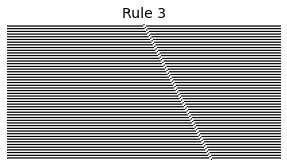

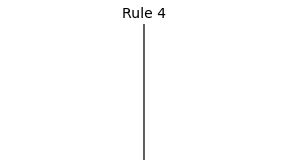

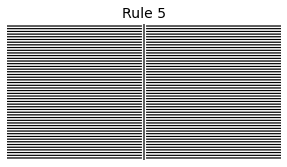

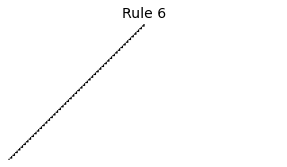

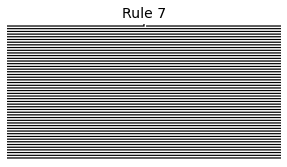

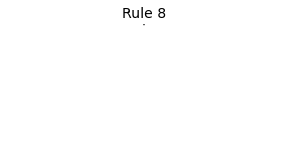

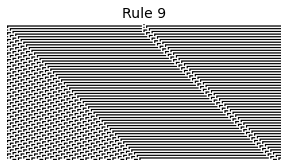

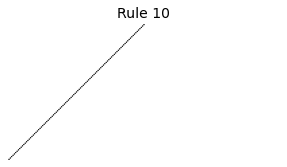

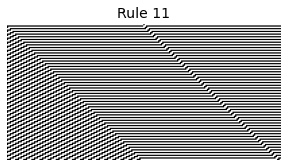

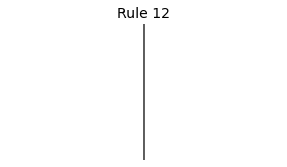

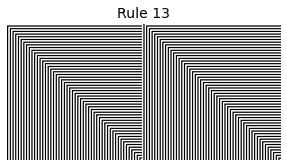

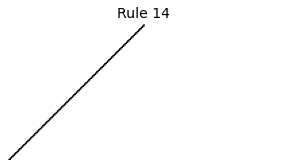

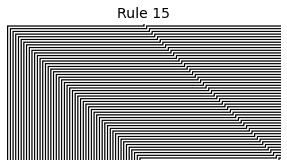

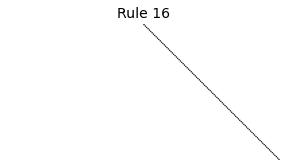

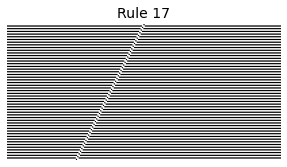

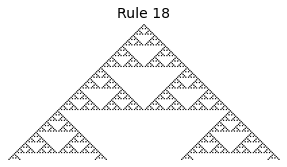

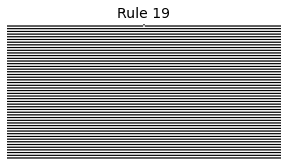

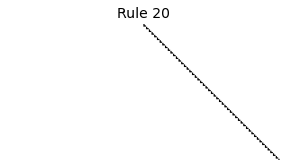

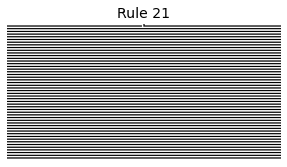

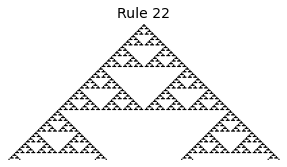

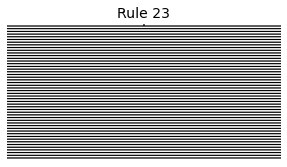

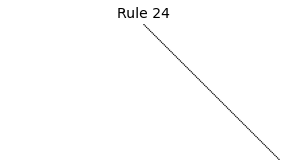

In [6]:
for i in range(25):
    rule = get_rule(i)
    board = generate_map([0,1,0], rule, num_iterations=100)
    visualize_board(board, rule["name"]) 